<h5>Choosing the approch for  Reading the file</h5>
    
<p>we will compare 4 ways of reading csv file</p>
  <ul>
     <li>Pandas</li>
      <li>Dask</li>
      <li>Ray</li>
      <li>Moudin</li>
  </ul>
    

In [3]:
import os
import time
import dask.dataframe as dd
import dask.array as da
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action="ignore")

In [21]:
# import pandas as pd
import ray.dataframe as rd

ModuleNotFoundError: No module named 'ray.dataframe'


let's define a method that can calculate the time of computation for each  method of reading


In [32]:
def read_computing_time(method: str):
    method=method.lower()
    if method== 'pandas':
        start_time= time.time()
        df_pandas = pd.read_csv('CAR_DETAILS.csv')
        end_time = time.time()
        read_time = end_time-start_time
        print('the time reading for {} is {}s'.format(method,float(read_time)))
        return df_pandas
    
    if method =='dask':
        start_time = time.time()
        df_dask = dd.read_csv('CAR_DETAILS.csv')
        end_time = time.time()
        read_time = end_time-start_time
        print('the time reading for {} is {}s'.format(method,float(read_time)))
        return df_dask
    
    if method=='modin':
        import modin.pandas as md
        start_time = time.time()
        df_modin = dd.read_csv('CAR_DETAILS.csv')
        end_time = time.time()
        read_time = end_time-start_time
        print('the time reading for {} is {}s'.format(method, float(read_time)))
        return df_modin
    if method=='ray':
        os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
        import modin.pandas as modin_ray
        start_time = time.time()
        df_ray = modin_ray.read_csv('CAR_DETAILS.csv')
        end_time = time.time()
        read_time = end_time-start_time
        print('the time reading for {} is {}s'.format(method,float(read_time)))
        return df_ray
        
        
    
        
        
        
    

In [25]:
read_computing_time('pandas')

the time reading for pandas is 0.010987520217895508


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [26]:
read_computing_time('dask')

the time reading for dask is 0.01194620132446289


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
npartitions=1,,,,,,,,
,object,int64,int64,int64,object,object,object,object
,...,...,...,...,...,...,...,...


In [30]:
read_computing_time('modin')

the time reading for modin is 0.006224393844604492


,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
npartitions=1,,,,,,,
,int64,int64,int64,object,object,object,object
,...,...,...,...,...,...,...


In [33]:
read_computing_time('ray')

the time reading for ray is 0.03453707695007324s


OptionError: 'Pattern matched multiple keys'

                                     name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
0     Petrol  Individ


Visulazation of reading_time


Text(0.5, 1.0, 'Reading Time Comparison')

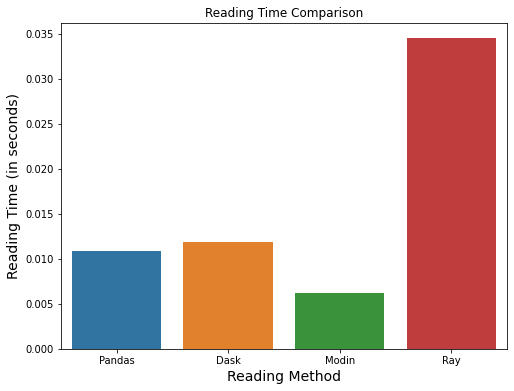

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
reading_time =[0.0109,0.0119,0.0062,0.0345]
method = ['Pandas','Dask','Modin','Ray']
df_reading_time = pd.DataFrame({'Method':method,'Reading Time':reading_time})

plt.figure(figsize=(8, 6))
sns.barplot(x='Method',y='Reading Time',data=df_reading_time)

plt.xlabel("Reading Method", size=14)
plt.ylabel("Reading Time (in seconds)", size=14)
plt.title('Reading Time Comparison')

Modin is the fastest at reading the file

In [5]:
os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
import modin.pandas as modin_ray
s = time.time()
df_modin_ray = modin_ray.read_csv("games.csv")
r_read = time.time() - s
print(f'Ray Reading time: {r_read} s')
    




Ray Reading time: 7.484252691268921 s
